In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
dmart = pd.read_csv('C:/Users/tamilsp/Downloads/DMart_Dataset.csv')
dmart

Order ID Customer Name           Category      Sub Category         City  \
0         OD1        Harish       Oil & Masala           Masalas      Vellore   
1         OD2         Sudha          Beverages     Health Drinks  Krishnagiri   
2         OD3       Hussain        Food Grains      Atta & Flour   Perambalur   
3         OD4       Jackson   Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4         OD5       Ridhesh        Food Grains   Organic Staples         Ooty   
...       ...           ...                ...               ...          ...   
9989   OD9990        Sudeep  Eggs, Meat & Fish              Eggs      Madurai   
9990   OD9991          Alan             Bakery          Biscuits  Kanyakumari   
9991   OD9992          Ravi        Food Grains              Rice         Bodi   
9992   OD9993          Peer       Oil & Masala            Spices   Pudukottai   
9993   OD9994        Ganesh        Food Grains      Atta & Flour  Tirunelveli   

      Order Date Region  Sales  Discount  Profit       State  
0     11-08-2017  North   1254      0.12  401.28  Tamil Nadu  
1     11-08-2017  South    749      0.18  149.80  Tamil Nadu  
2     06-12-2017   West   2360      0.21  165.20  Tamil Nadu  
3     10-11-2016  South    896      0.25   89.60  Tamil Nadu  
4     10-11-2016  South   2355      0.26  918.45  Tamil Nadu  
...          ...    ...    ...       ...     ...         ...  
9989  12/24/2015   West    945      0.16  359.10  Tamil Nadu  
9990  07-12-2015   West   1195      0.26   71.70  Tamil Nadu  
9991  06-06-2017   West   1567      0.16  501.44  Tamil Nadu  
9992  10/16/2018   West   1659      0.15  597.24  Tamil Nadu  
9993   4/17/2018   West   1034      0.28  165.44  Tamil Nadu  

[9994 rows x 11 columns]

In [3]:
dmart.shape

(9994, 11)

In [4]:
dmart.describe()

Sales     Discount       Profit
count  9994.000000  9994.000000  9994.000000
mean   1496.596158     0.226817   374.937082
std     577.559036     0.074636   239.932881
min     500.000000     0.100000    25.250000
25%    1000.000000     0.160000   180.022500
50%    1498.000000     0.230000   320.780000
75%    1994.750000     0.290000   525.627500
max    2500.000000     0.350000  1120.950000

In [5]:
dmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [ ]:
# Convert categorical into numerical
dmart = dmart.drop(columns = ["Order ID", "Customer Name", "Order Date"])
label_encoders = {}
for col in dmart.select_dtypes(include=['object']).columns:
    label = LabelEncoder()
    dmart[col] = label.fit_transform(dmart[col])
    label_encoders[col] = label

In [ ]:
# Adding New Column
dmart['Sales_High_Low'] = (dmart['Sales'] > dmart['Sales'].median()).astype(int)
print("Converted Sales column into Binary")

Converted Sales column into Binary


In [ ]:
# Split 80 for trainband 20 for test, To predict (Sales High or Low)
X = dmart.drop(columns=["Sales", "Sales_High_Low"])
y = dmart['Sales_High_Low']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Model Build & Evaluated successfully")
print("Accuracy:",accuracy_score(y_test, y_pred)*100,"%")

Model Build & Evaluated successfully
Accuracy: 70.93546773386693 %


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73       992
           1       0.75      0.63      0.68      1007

    accuracy                           0.71      1999
   macro avg       0.72      0.71      0.71      1999
weighted avg       0.72      0.71      0.71      1999



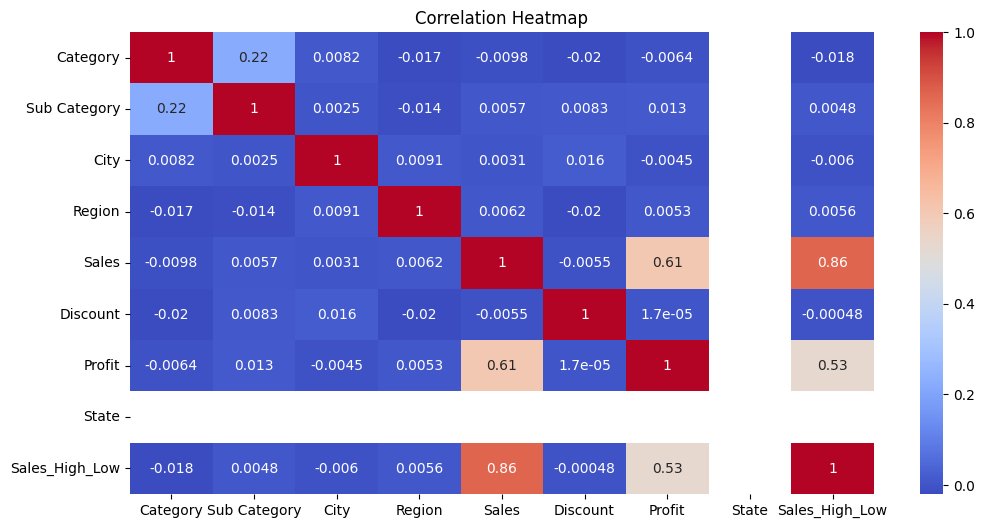

In [24]:
eda = pd.DataFrame(dmart)
plt.figure(figsize=(12, 6))
sns.heatmap(eda.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show();

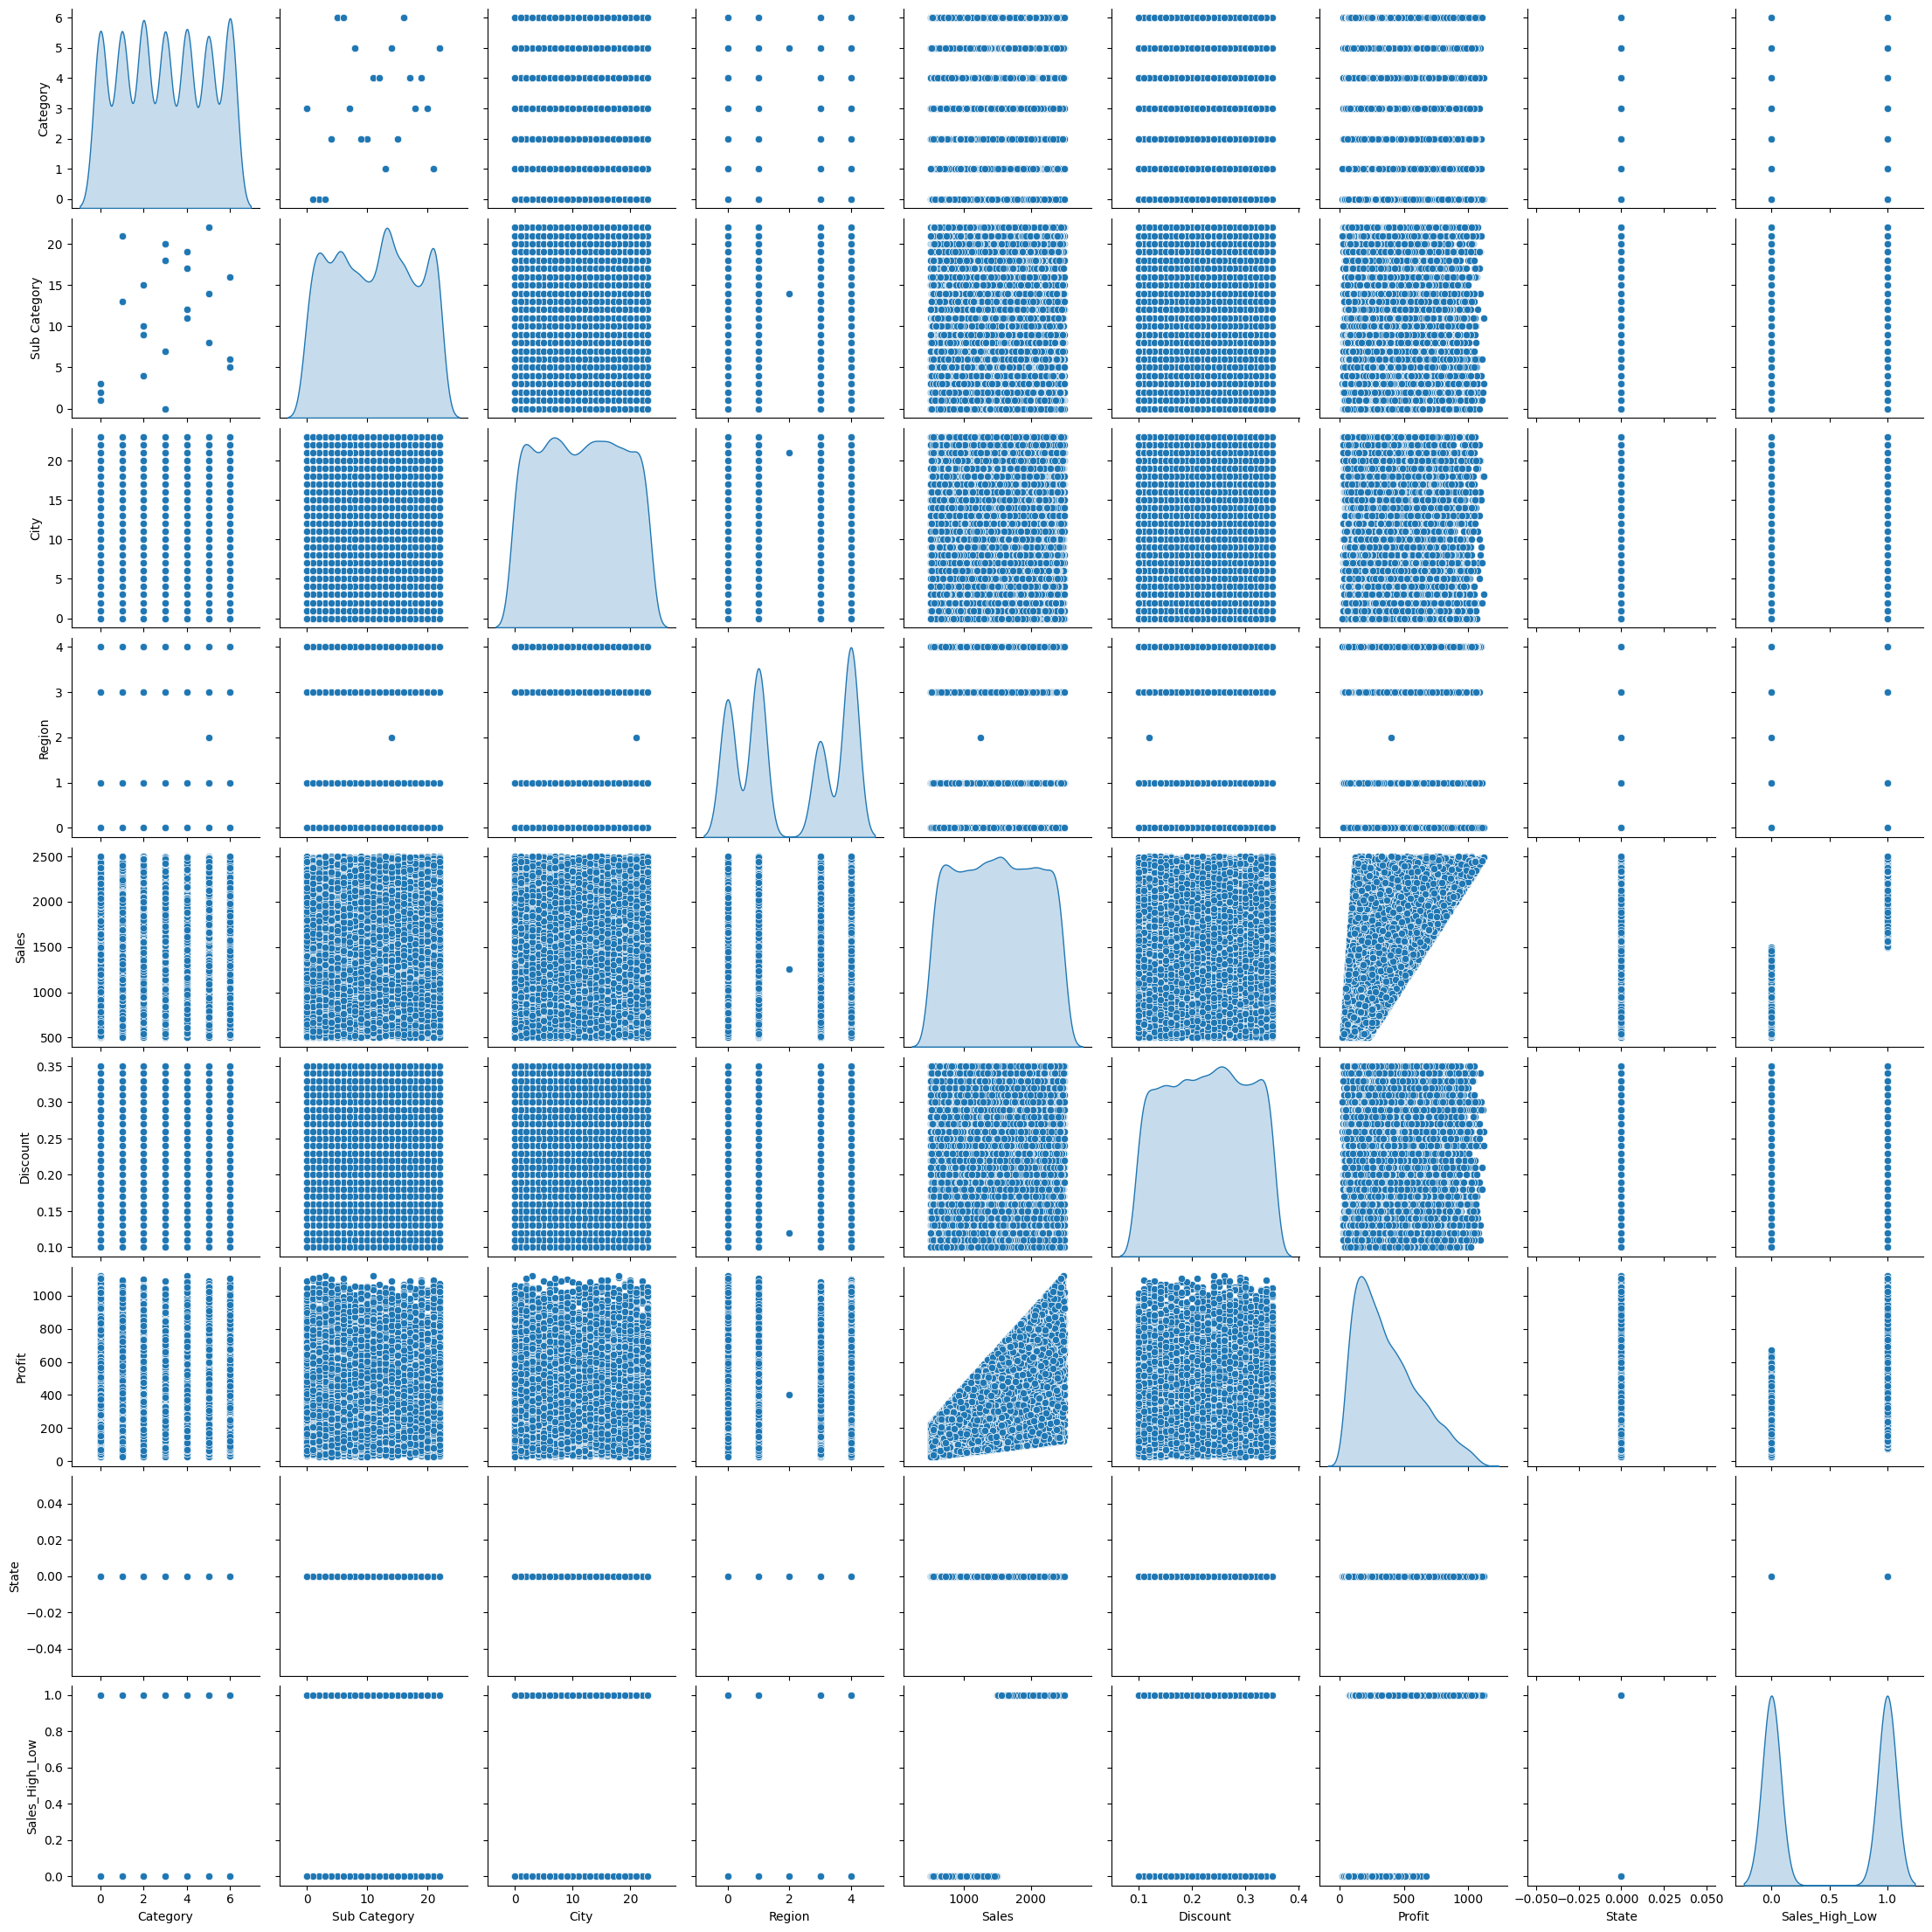

In [13]:
sns.pairplot(eda, diag_kind='kde')
plt.show();

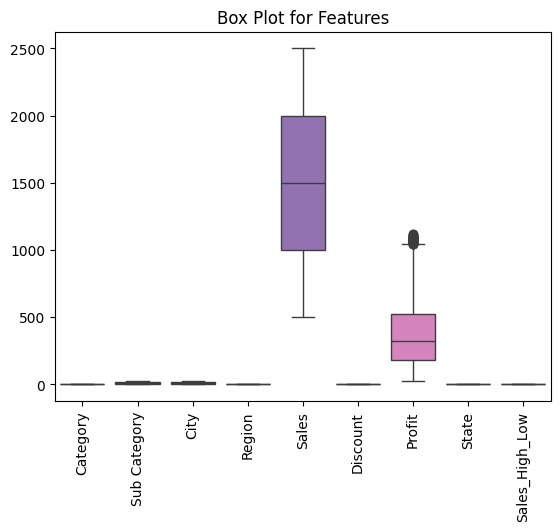

In [14]:
sns.boxplot(data=eda.select_dtypes(include=['number']))
plt.xticks(rotation=90)
plt.title("Box Plot for Features")
plt.show();

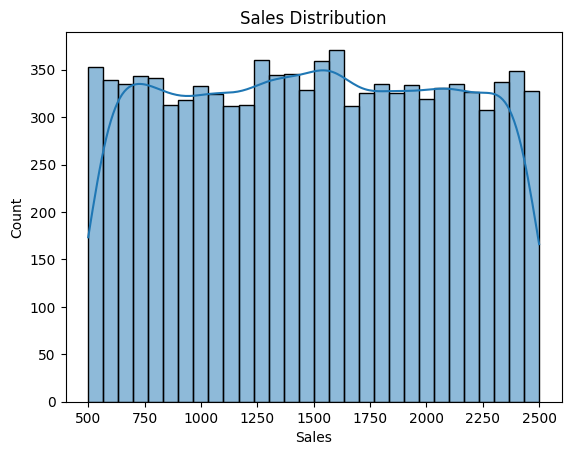

In [15]:
sns.histplot(eda['Sales'], bins=30, kde=True)
plt.title("Sales Distribution")
plt.show();

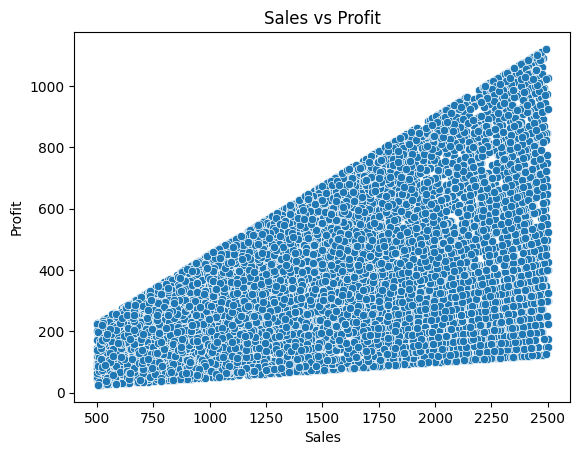

In [16]:
sns.scatterplot(x=eda['Sales'], y=eda['Profit'])
plt.title("Sales vs Profit")
plt.show();